#Dimensionality Reduction using Mercedez-Benz Greener Manufacturing

**Citation:** Alexander Novy, CH1Mercedes, Christian Drescher, Christian Pfaundler, KOESIM, Will Cukierski. (2017). Mercedes-Benz Greener Manufacturing. Kaggle. https://kaggle.com/competitions/mercedes-benz-greener-manufacturing

References:

* [Kaggle Original Source of Mercedes-Benz-Greener](https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/overview)
* [Github Documentation of Mercedes-Benz Greener](https://github.com/subhadipml/Mercedes-Benz-Greener-Manufacturing)
* [Medium Documentation of Mercedes-Benz with ML](https://medium.com/swlh/greener-manufacturing-with-machine-learning-6ec77d0e7a91)
*[Medium Documentation of Mercedes-Benz with Stacking ML Algorithm](https://blog.goodaudience.com/stacking-ml-algorithm-for-mercedes-benz-greener-manufacturing-competition-5600762186ae)



**Dimensionality Reduction**

**1. What is Dimensionality Reduction?**

   - **Definition**: Dimensionality reduction is a technique used to reduce the number of features (variables or dimensions) in a dataset while preserving its essential information and patterns.
   
   - **Objective**: Simplify complex datasets, remove noise, improve computational efficiency, and aid in data visualization.

**2. Why Use Dimensionality Reduction?**

   - **Curse of Dimensionality**: High-dimensional data can be challenging to work with, leading to increased computation time and overfitting.
   
   - **Noise Reduction**: Eliminate noisy or irrelevant features that don't contribute significantly to model performance.
   
   - **Visualization**: Reduce data to a lower dimension for easy visualization in 2D or 3D space.
   
   - **Interpretability**: Simplify data for better human understanding.

**3. Techniques for Dimensionality Reduction:**

   - **Principal Component Analysis (PCA)**:
     - Linear technique that finds orthogonal axes (principal components) capturing maximum variance.
     - Commonly used for numerical data.
   
   - **Truncated Singular Value Decomposition (tSVD)**:
     - Linear technique similar to PCA but applied to sparse matrices.
     - Suitable for text and sparse data.
   
   - **Independent Component Analysis (ICA)**:
     - Linear technique that separates mixed signals into independent components.
     - Useful for separating sources in signal processing.
   
   - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
     - Non-linear technique for visualizing high-dimensional data in lower dimensions.
     - Excellent for data visualization.
   
   - **Autoencoders**:
     - Neural network-based technique that learns a compressed representation of the data.
     - Suitable for non-linear data and deep learning.
   
   - **Feature Selection**:
     - Not strictly dimensionality reduction but involves selecting the most important features based on relevance and importance scores.

**4. How to Decide Which Features to Use/Drop:**

   - **Explained Variance**:
     - In PCA and tSVD, check the explained variance ratio to see how much variance each component captures.
     - Choose the number of components that retain a significant portion of the total variance (e.g., 95% or more).
   
   - **Feature Importance**:
     - In tree-based models (e.g., Random Forest), use feature importance scores to identify relevant features.
   
   - **Correlation Analysis**:
     - Analyze feature correlations to identify highly correlated or redundant features.
     - Keep one feature from a highly correlated pair.
   
   - **Univariate Feature Selection**:
     - Use statistical tests (e.g., chi-squared, ANOVA) to select features with the strongest relationship to the target variable.
   
   - **Domain Knowledge**:
     - Leverage domain expertise to identify and retain features known to be important for the problem.
   
   - **Recursive Feature Elimination (RFE)**:
     - Iteratively remove the least important features until a desired number remains.
   
   - **Regularization**:
     - In linear models, regularization techniques (e.g., L1/L2 regularization) can automatically shrink or eliminate less important features.

**5. Key Takeaways:**

   - Dimensionality reduction simplifies high-dimensional data while preserving key information.
   
   - The choice of technique depends on the nature of the data and the problem.
   
   - Selecting features to use or drop requires a combination of statistical analysis, domain knowledge, and experimentation.
   
   - It's essential to strike a balance between dimensionality reduction and information loss to maintain model performance.

Feel free to use this cheat sheet as a reference to explain dimensionality reduction concepts to your students, and adapt it as needed to suit your teaching style and specific examples.

**Prompt for Generating Code**

To get every cell of code, you can use the following prompts:

1. "Load the dataset and display basic information."
2. "Check for missing values in the dataset."
3. "Display summary statistics of the dataset."
4. "Visualize the distribution of the target variable 'y'."
5. "Standardize the features."
6. "Apply PCA for dimensionality reduction with a specific number of components."
7. "Print the explained variance ratio."
8. "Generate code to visualize the principal components."
9. "Generate code to interpret the results and choose the number of components."
10. "Conclusion and insights from dimensionality reduction."

Feel free to use these prompts to navigate through the code cells for each step in your interaction with GPT-3. You can specify the step number or ask for explanations as needed.

Here's a hands-on guide on practical dimensionality reduction using the Mercedes-Benz dataset and Python. We will follow the steps you outlined, including dataset exploration, dimensionality reduction, and providing comments and explanations for each code block. We will use Principal Component Analysis (PCA) as the dimensionality reduction technique.

##**Step 1: Dataset Description and Problem**

The Mercedes-Benz dataset contains features representing custom features in Mercedes cars, and the goal is to predict the time (in seconds) it takes for each car configuration to pass testing.

##**Step 2: Exploratory Data Analysis (EDA)**

Let's start by exploring the dataset to gain a better understanding of its structure and characteristics.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None
ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64
                ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16        

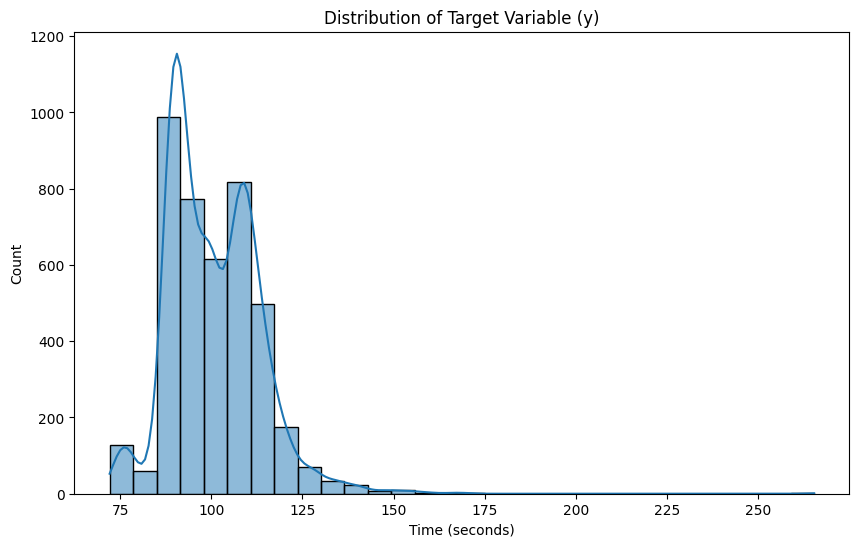

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train = pd.read_csv('train.csv')

# Display basic information about the dataset
print(train.info())

# Check for missing values
print(train.isnull().sum())

# Summary statistics
print(train.describe())

# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(10, 6))
sns.histplot(train['y'], bins=30, kde=True)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Time (seconds)')
plt.show()

The needs of dimensionality reduction:

**1. Understanding the Dataset:**
   - Your dataset has 4,209 entries (rows) and 378 columns (features).
   - The data types include float64, int64, and object (categorical).
   - There are no missing values in the dataset.

**2. Features in the Dataset:**
   - Each column in the dataset represents a feature or attribute. These features are labeled as 'X0' to 'X385'.
   - Features 'ID' and 'y' are also present.
   - Most of the features (369 out of 378) are integer values, while one is a floating-point number, and eight are categorical (object) features.

**3. Why Dimensionality Reduction is Needed:**
   - With 378 features, the dataset is considered high-dimensional.
   - High-dimensionality can lead to several challenges:

**A. Computational Complexity:**
   - High-dimensional data requires significantly more computational resources (memory, processing time) for analysis.
   - Running algorithms and models on high-dimensional data can be slow and resource-intensive.

**B. Curse of Dimensionality:**
   - High-dimensional spaces can be sparse, meaning data points are far apart from each other.
   - This sparsity can lead to overfitting when building machine learning models because the model may capture noise rather than real patterns.

**C. Visualization Challenges:**
   - Visualizing data in high-dimensional space is difficult for humans.
   - It's challenging to plot or understand data with more than three dimensions.

**4. When to Consider Dimensionality Reduction:**
   - Dimensionality reduction techniques should be considered when:
     - The dataset has a large number of features (high dimensionality).
     - Computational resources are limited.
     - There's a need for data visualization.
     - Overfitting is a concern.

**5. Potential Dimensionality Reduction Techniques:**
   - Some of the techniques you plan to cover (e.g., PCA, tSVD, feature selection).
   - These techniques help reduce the number of features while preserving important information and patterns.

**6. Example for Understanding:**
   - For instance, consider a dataset with 100 features, each representing different properties of houses. By applying dimensionality reduction, you can combine these features into a smaller set of variables that still capture the most critical aspects of a house, such as size, location, and age, while discarding less important details.

**7. Benefits of Dimensionality Reduction:**
   - The advantages of dimensionality reduction:
     - Faster computation.
     - Reduced risk of overfitting.
     - Improved visualization.
     - Easier model interpretation.

**8. Practical Application:**
   - Dimensionality reduction is commonly used in various fields, including machine learning, image processing, and natural language processing, to simplify complex data.

This is why dimensionality reduction is necessary and how it can benefit data analysis and machine learning tasks.

##**Step 3: Dimensionality Reduction (Using PCA)**

In this step, we'll apply PCA to reduce the dimensionality of the dataset.

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Drop 'ID' and 'y' columns for PCA
X = train.drop(['ID', 'y'], axis=1)

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Standardize the numeric features (PCA works best with standardized data)
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Apply PCA with a desired number of components
n_components = 10  # You can choose an appropriate number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.06892669 0.05688412 0.04537457 0.03426771 0.03264309 0.03162661
 0.02862524 0.02123735 0.01970403 0.01783147]


The "Explained Variance Ratio" output from PCA provides valuable information about how much of the total variance in the original dataset is explained by each principal component. This information is crucial for understanding the effectiveness of dimensionality reduction and deciding how many principal components to retain.

Here's the insight of that output:

1. **Interpreting the Explained Variance Ratio**:
   - The numbers you see represent the proportion of the total variance in the data that each principal component explains. For example, the first component explains approximately 6.89% of the total variance, the second component explains about 5.69%, and so on.
   - These values are in descending order, meaning the first component explains the most variance, followed by the second component, and so forth.

2. **Choosing the Number of Components**:
   - The goal of PCA is to reduce the dimensionality of the data while retaining as much of the original information (variance) as possible.
   - You can decide how many principal components to keep based on your specific objectives. A common approach is to choose a number of components that collectively explain a high percentage of the total variance.
   - For example, if you want to retain 95% of the variance, you would sum the explained variance ratios and select the first 'k' components where the cumulative explained variance exceeds 95%.

3. **Interpretation and Trade-offs**:
   - Each principal component is a linear combination of the original features. When you retain a component, you retain a certain pattern or structure in the data.
   - Reducing the number of components can simplify the dataset and speed up subsequent machine learning algorithms. However, it comes at the cost of losing some detailed information present in the original data.

4. **Visualization**:
   - You can also visualize the explained variance ratio using a scree plot or a cumulative variance plot to see how quickly the variance accumulates with each additional component. This can help in deciding the appropriate number of components visually.

5. **Balancing Dimensionality Reduction and Information Loss**:
   - It's essential to strike a balance between dimensionality reduction and information loss. A common practice is to experiment with different numbers of components and assess the impact on model performance (e.g., in a predictive modeling task).
   - The choice of the number of components may also depend on computational constraints and the specific problem you're solving.

In summary, the explained variance ratio in PCA informs us about the contribution of each component to the total variance. It's a critical metric for dimensionality reduction because it helps you make informed decisions about how many components to keep, aiming to retain most of the original data's variability while simplifying the dataset.

In [7]:
from sklearn.decomposition import TruncatedSVD

# Separate features and target variable
X = train.drop(['ID', 'y'], axis=1)  # Exclude 'ID' and 'y' columns
y = train['y']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Separate numeric and categorical features
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = list(set(X.columns) - set(numeric_cols))

# Standardize the numeric features (tSVD works best with standardized data)
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Apply tSVD with a desired number of components
n_components = 10  # You can choose an appropriate number of components
tsvd = TruncatedSVD(n_components=n_components, random_state=42)
X_tsvd = tsvd.fit_transform(X[numeric_cols])

# Explained variance ratio
explained_variance_ratio = tsvd.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.06892669 0.05688412 0.04537457 0.03426771 0.03264305 0.0316266
 0.02862522 0.0212368  0.01969366 0.01782841]


##**Step 4: Interpretation and Conclusion**

The explained variance ratio tells us how much of the total variance in the data is explained by each principal component. You can decide how many components to keep based on this information and your specific goals.